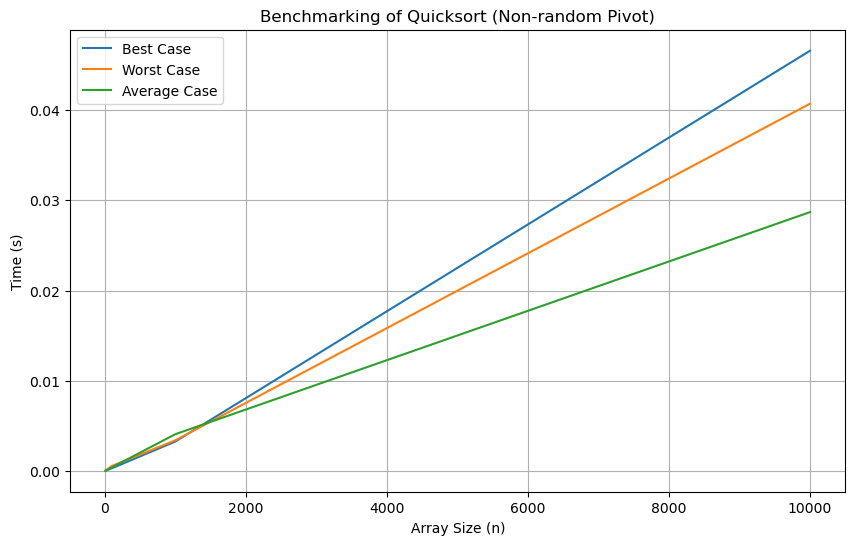

In [16]:
import timeit
import random
import matplotlib.pyplot as plt
def generate_inp(n,case):
    if case == "best":
        return list(range(1,n+1))
    elif case == "worst":
        return list(range(n,0,-1))
    elif case == "average":
        return [random.randint(1,1000) for _ in range(n)]
def qs_nonrandom_pivot(A):
    if len(A) <= 1:
        return A
    pi=A[len(A) // 2]
    lesser=[x for x in A if x < pi]
    equal=[x for x in A if x == pi]
    greater=[x for x in A if x > pi]
    return qs_nonrandom_pivot(lesser) + equal + qs_nonrandom_pivot(greater)
def benchmark_qs_nonran(c,i):
    results=[]
    for i in i:
        A= generate_inp(i,c)
        t=timeit.timeit(lambda: qs_nonrandom_pivot(A.copy()),number=1)
        results.append((i,t))
    return results

i=[10,100,1000,10000]
#best case
best_case=benchmark_qs_nonran("best",i)
#worst case
worst_case=benchmark_qs_nonran("worst",i)
#average case
average_case=benchmark_qs_nonran("average",i)

plt.figure(figsize=(10,6))
plt.plot([result[0] for result in best_case],[result[1] for result in best_case],label="Best Case")
plt.plot([result[0] for result in worst_case],[result[1] for result in worst_case],label="Worst Case")
plt.plot([result[0] for result in average_case],[result[1] for result in average_case],label="Average Case")
plt.xlabel("Array Size (n)")
plt.ylabel("Time (s)")
plt.title("Benchmarking of Quicksort (Non-random Pivot)")
plt.legend()
plt.grid(True)
plt.show()